<a href="https://colab.research.google.com/github/analluvias/classificando_sistemas/blob/master/classificacao_de_sistemas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# linearidade

In [ ]:
t = np.linspace(-10, 10, 1000)
x1 = lambda t: np.sin(t)
x2 = lambda t: (t % (2*np.pi))/np.pi

def checkLinearity(Tr, titleStr):
    x1plusx2 = lambda t: x1(t)+x2(t)
    plt.subplot(121)
    plt.plot(t, x1(t), label=r'$x_1(t)$')
    plt.plot(t, x2(t), label=r'$x_2(t)$')
    plt.plot(t, x1plusx2(t), label=r'$x_1(t)+x_2(t)$')

    plt.subplot(122)
    plt.plot(t, Tr(x1)(t), label=r'$Tr\{x_1(t)\}$')
    plt.plot(t, Tr(x2)(t), label=r'$Tr\{y_2(t)\}$')
    plt.plot(t, Tr(x1)(t)+Tr(x2)(t), 'k--', lw=3, label=r'$Tr\{x_1(t)\}+Tr\{x_2(t)\}$')
    plt.plot(t, Tr(x1plusx2)(t), label=r'$Tr\{x_1(t)+x_2(t)\}$')

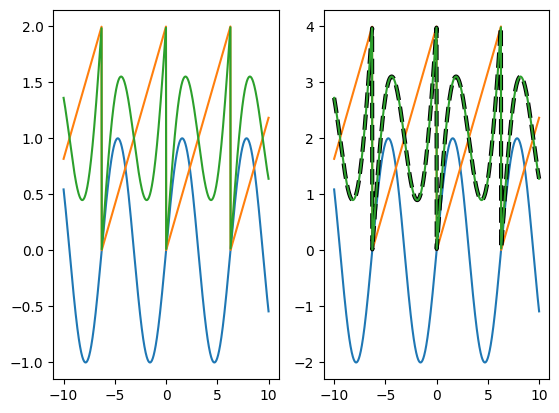

In [ ]:
def Tr(x):
    return lambda t: 2*x(t)
checkLinearity(Tr, '$y(t)=2x(t)$')


In [ ]:
# Causalidade e memória

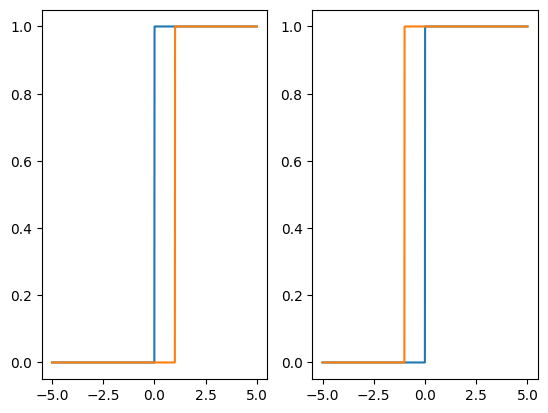

In [ ]:
t = np.linspace(-5, 5, 1000)
x = lambda t: (t>=0).astype(float)

def Tr1(x):
    return lambda t: x(t-1)

def Tr2(x):
    return lambda t: x(t+1)

def checkCausality(Tr):
    plt.plot(t, x(t), label='Input $x(t)$')
    plt.plot(t, Tr(x)(t), label=r'Output $y(t)=Tr\{x(t)\}$')

plt.subplot(121)
checkCausality(Tr1)

plt.subplot(122)
checkCausality(Tr2)

In [ ]:
# checa causalidade e memória

import re

def checa_causalidade_e_memoria(funcao):

  futuro = 0
  presente = 0
  passado = 0

  termos = re.findall(r'\((.*?)\)', funcao)

  for termo in termos:
    if re.search(r'\+', termo):
      futuro += 1
    elif re.search(r'\-', termo):
      passado += 1
    else:
      presente += 1

  if (presente != 0 and passado != 0):
    print("Sistema Causal")
    return
  if (presente != 0):
    print("Sistema Causal")
  if(passado != 0 or futuro != 0):
    print("Sistema com Memória")


funcao = 'x(t) + x(t-1) + x(t-2)'
variavel = 't'
checa_causalidade_e_memoria(funcao)

Sistema Causal


# Variação no tempo

In [ ]:
t = np.linspace(-2,4, 1000)
x = lambda t: np.exp(-t)*(t>=0).astype(float)

def verifica_invariacia(tempo, y):

  tempo_inicial_x = 0
  tempo_inicial_y = 0

  for num in range (0, 999):
    if (x(tempo)[num] != 0 and tempo_inicial_x == 0):
      tempo_inicial_x = num

    if(y(t)[num] != 0 and tempo_inicial_y == 0):
      tempo_inicial_y = num

  if (tempo_inicial_x == tempo_inicial_y):
    return True


def showTimeInvariance(Tr):
    plt.subplot(121)
    plt.plot(t, x(t), label='$x(t)$')
    plt.plot(t, x(t-0.5), label=r'$x(t-\frac{1}{2})$')
    plt.plot(t, x(t-1), label=r'$x(t-1)$')

    plt.subplot(122)
    y1 = Tr(x)
    y2 = Tr(lambda t: x(t-0.5))
    y3 = Tr(lambda t: x(t-1))
    plt.plot(t, y1(t), label=r'$Tr\{x(t)\}$')
    plt.plot(t, y2(t), label=r'$Tr\{x(t-\frac{1}{2})\}$')
    plt.plot(t, y3(t), label=r'$Tr\{x(t-1)\}$')

    print( x(t)[500] - x(t-0.5)[500] )
    print(y1(t)[500] - y2(t)[500])

    if ( verifica_invariacia(t, y1) ):
      if (verifica_invariacia((t-0.5), y2)):
        if (verifica_invariacia((t-1), y3)):
          print("O sistema é invariante no tempo")
        else:
          print("O sistema varia no tempo")
      else:
        print("O sistema varia no tempo")
    else:
      print("O sistema varia no tempo")


-0.23793562322046158
-0.08726916066157328
O sistema varia no tempo


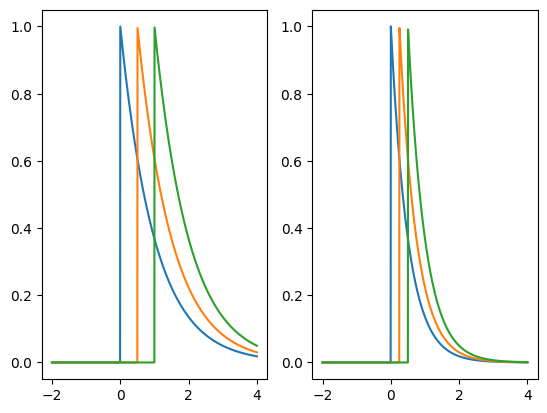

In [ ]:
# def Tr(x):
#     return lambda t: t*x(t)

# def Tr(x):
#     return lambda t: x(t)**2

def Tr(x):
    return lambda t: x(2*t)

showTimeInvariance(Tr)

# Estabilidade

In [ ]:
# t = np.linspace(-10, 10, 1000)
# c = np.full(1000, 5)
# x = lambda t: t * c

t = np.linspace(-10, 10, 1000)
c = np.full(1000, 5)
x = lambda t: np.exp(c)

def estabilidade_da_funcao():
    plt.subplot(131)
    plt.plot(t, x(t), label='$x(t)$')
    plt.legend()
    plt.show()


    resultado = x(t)
    result_ant = resultado[0]
    for i in range(1, resultado.shape[0]):

      if (result_ant != resultado[i]):
        print("O sistema é instável")
        return

      result_ant = resultado[i]

    print("O sistema é estável")

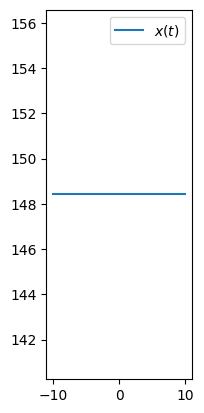

O sistema é estável


In [ ]:
estabilidade_da_funcao();